In [ ]:
##LOADING DATA
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')
Lecture = "drive/MyDrive/CHE_Spring_ML"
df = pd.read_csv(Lecture + '/glass.data')
df = df.rename(columns={'1':'counter','1.52101':'refractive index','13.64':'Na_wt%','4.49':'Mg_wt%','1.10':'Al_wt%','71.78':'Si_wt%','0.06':'K_wt%', '8.75':'Ca_wt%','0.00':'Ba_wt%','0.00.1':'Fe_wt%','1.1':'Glass type'})
print(df.shape)
print(df)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
(213, 11)
     counter  refractive index  Na_wt%  Mg_wt%  Al_wt%  Si_wt%  K_wt%  Ca_wt%  \
0          2           1.51761   13.89    3.60    1.36   72.73   0.48    7.83   
1          3           1.51618   13.53    3.55    1.54   72.99   0.39    7.78   
2          4           1.51766   13.21    3.69    1.29   72.61   0.57    8.22   
3          5           1.51742   13.27    3.62    1.24   73.08   0.55    8.07   
4          6           1.51596   12.79    3.61    1.62   72.97   0.64    8.07   
..       ...               ...     ...     ...     ...     ...    ...     ...   
208      210           1.51623   14.14    0.00    2.88   72.61   0.08    9.18   
209      211           1.51685   14.92    0.00    1.99   73.06   0.00    8.40   
210      212           1.52065   14.36    0.00    2.02   73.42   0.00    8.44   
211      213           1.51651   14.38    0.00   

In [ ]:
##DATA PREPROCESSING
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:, 1:10].values
y = df.iloc[:, 10].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_
feature_names = np.array(['Refractive Index',
                 'Na_wt%',
                 'Mg_wt%',
                 'Al_wt%',
                 'Si_wt%',
                 'K_wt%',
                 'Ca_wt%',
                 'Ba_wt%',
                 'Fe_wt%'], dtype=object)

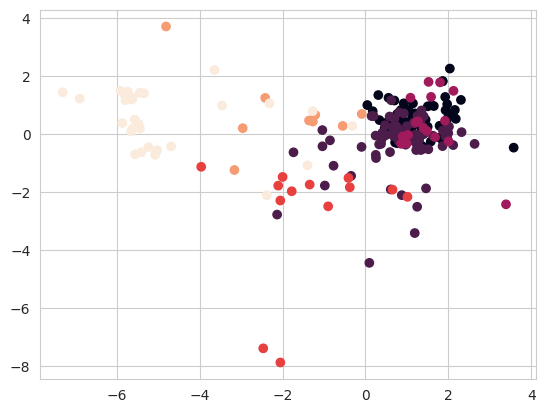

In [ ]:
##3. Visualize the data in reduced feature space
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
import matplotlib.pyplot as plt
import seaborn as sns
LDA = lda(n_components=2)
X_LDA = LDA.fit_transform(X,y)
plt.scatter(X_LDA[:,0], X_LDA[:,1], c = y)

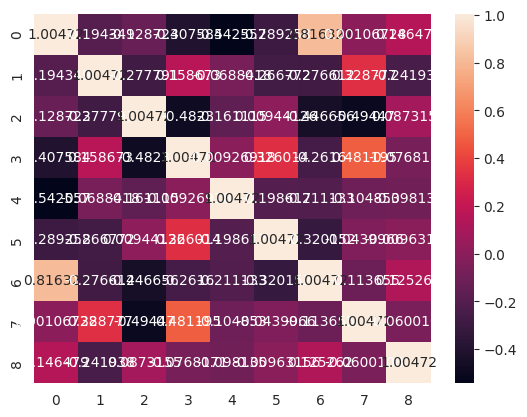

[[ 1.51761 13.89     3.6     ...  7.83     0.       0.     ]
 [ 1.51618 13.53     3.55    ...  7.78     0.       0.     ]
 [ 1.51766 13.21     3.69    ...  8.22     0.       0.     ]
 ...
 [ 1.52065 14.36     0.      ...  8.44     1.64     0.     ]
 [ 1.51651 14.38     0.      ...  8.48     1.57     0.     ]
 [ 1.51711 14.23     0.      ...  8.62     1.67     0.     ]]


In [ ]:
##Covariance matrix
import pylab as plt
import matplotlib.image as mpimg
from matplotlib import cm
import numpy as np
import pandas as pd

X_orig = df.iloc[:, 1:10].values #<- create a matrix
X_mean = X_orig.mean(axis=0)
X_std = X_orig.std(axis=0)

Xsd = (X_orig - X_mean)/X_std #<- standardize the data

XX = np.dot(Xsd.T, Xsd)
cov = XX/(Xsd.shape[0] - 1)

cov_np = np.cov(Xsd.T) #numpy wants each column to represent a sample so X is transposed

sns.heatmap(cov_np, annot=True, fmt='g')
plt.show()

In [ ]:
##TRAIN/TEST SPLIT AND PIPELINES
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

In [ ]:
##NEURAL NETWORK
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter = 5000, activation='relu', batch_size='auto', hidden_layer_sizes=(128,128,64), learning_rate_init=0.0001)
mlp

mlp.fit(X_train, y_train)

pred = mlp.predict(X_test)
pred

from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test,pred)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62        14
           1       0.61      0.73      0.67        15
           2       0.00      0.00      0.00         3
           3       1.00      0.67      0.80         3
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         6

    accuracy                           0.67        43
   macro avg       0.70      0.59      0.63        43
weighted avg       0.66      0.67      0.66        43



In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.9 MB/s eta 0:00:00


In [ ]:
##Random Forest model
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


#modelforest = RandomForestRegressor(n_estimators=90,max_depth=26)
modelforest = RandomForestClassifier(max_depth=None,
                              criterion='entropy',
                              random_state=4)
# model has a fit function like every other supervised method in sklearn
modelforest.fit(
    X=X_train,
    y=y_train,
)

pipe_forest = make_pipeline(StandardScaler(),
                  modelforest)

scoresforest = cross_val_score(estimator=pipe_forest,
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=1)
print(f'CV accuracy scores: {scoresforest}')
print(f'CV accuracy: {np.mean(scoresforest):.3f} '
      f'+/- {np.std(scoresforest):.3f}')

from skopt import BayesSearchCV
gsB = BayesSearchCV(
    RandomForestClassifier(),
    {
     'n_estimators': [200,500],
     'max_features': ['auto','sqrt'],
     'max_depth': [4,5,100],
     'criterion':['gini','entropy']
    },
    n_iter=15,
    cv=5
)

gsB = gsB.fit(X, y)
print(gsB.best_score_, gsB.best_params_)

CV accuracy scores: [0.85294118 0.58823529 0.73529412 0.85294118 0.64705882]
CV accuracy: 0.735 +/- 0.107
0.7276854928017719 OrderedDict([('criterion', 'entropy'), ('max_depth', 100), ('max_features', 'sqrt'), ('n_estimators', 377)])


In [ ]:
y_train_preds = gsB.best_estimator_.predict(X_train)
y_test_preds = gsB.best_estimator_.predict(X_test)

In [ ]:
print(classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         6

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [ ]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(modelforest, X_train, y_train)
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": perm_importance.importances_mean})
importance_df = importance_df.sort_values("Importance", ascending=False).reset_index(drop=True)

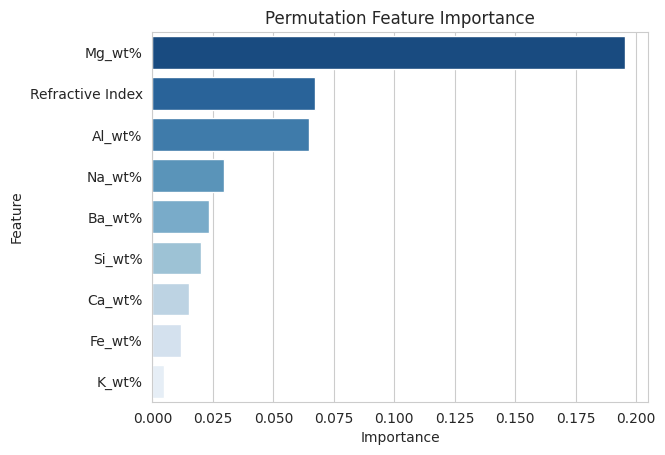

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")
plt.title("Permutation Feature Importance")
plt.xlabel("Importance")
plt.show()

In [ ]:
def ice_plot(model, X, feature_idx, feature_values, num_instances=100):
    """
    Computes ICE plot data.

    Parameters:
    - model: The trained model.
    - X: The input data (numpy array).
    - feature_idx: The index of the feature to be analyzed.
    - feature_values: The range of feature values to be used.
    - num_instances: Number of instances to be considered (default is 100).

    Returns:
    - A tuple with the feature_values and the corresponding ICE data.
    """
    X_selected = X[:num_instances].copy()
    ice_data = np.zeros((num_instances, len(feature_values)))

    for i, val in enumerate(feature_values):
        X_selected[:, feature_idx] = val
        ice_data[:, i] = model.predict(X_selected)

    return feature_values, ice_data

In [ ]:
feature_idx = 0  # refractive index
feature_values = np.linspace(min(X[:, feature_idx]), max(X[:, feature_idx]), num=100)

In [ ]:
feature_values, ice_data = ice_plot(modelforest, X_train, feature_idx, feature_values)

In [ ]:
def plot_ice(feature_values, ice_data, xlabel):
    """
    Plots the ICE plot.

    Parameters:
    - feature_values: The range of feature values used.
    - ice_data: The ICE plot data.
    - xlabel: The label for the x-axis.
    """
    plt.figure(figsize=(10, 6))
    for i in range(ice_data.shape[0]):
        plt.plot(feature_values, ice_data[i, :], c='gray', alpha=0.3)

    plt.xlabel(xlabel)
    plt.ylabel('Prediction')
    plt.title('ICE Plot')
    plt.show()

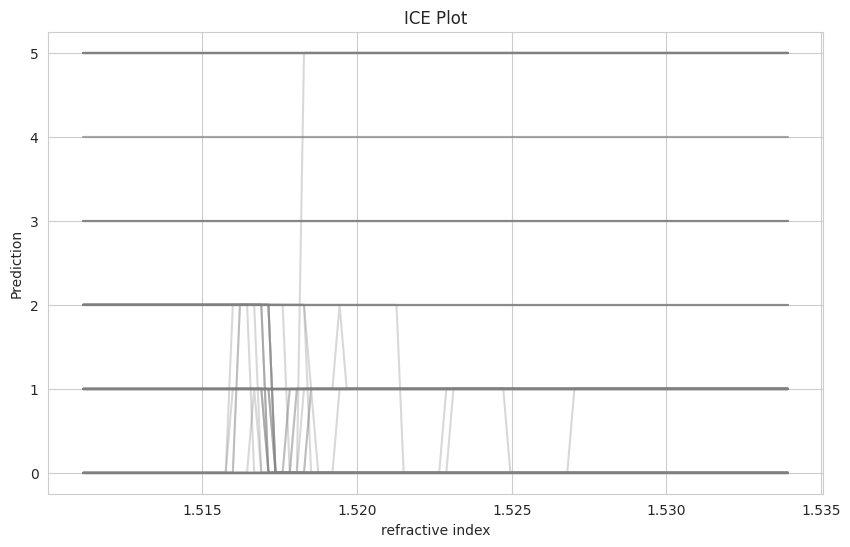

In [ ]:
plot_ice(feature_values, ice_data, xlabel='refractive index')

In [ ]:
feature_idx = 2  # mg_wt%
feature_values = np.linspace(min(X[:, feature_idx]), max(X[:, feature_idx]), num=100)

In [ ]:
feature_values, ice_data = ice_plot(modelforest, X_train, feature_idx, feature_values)

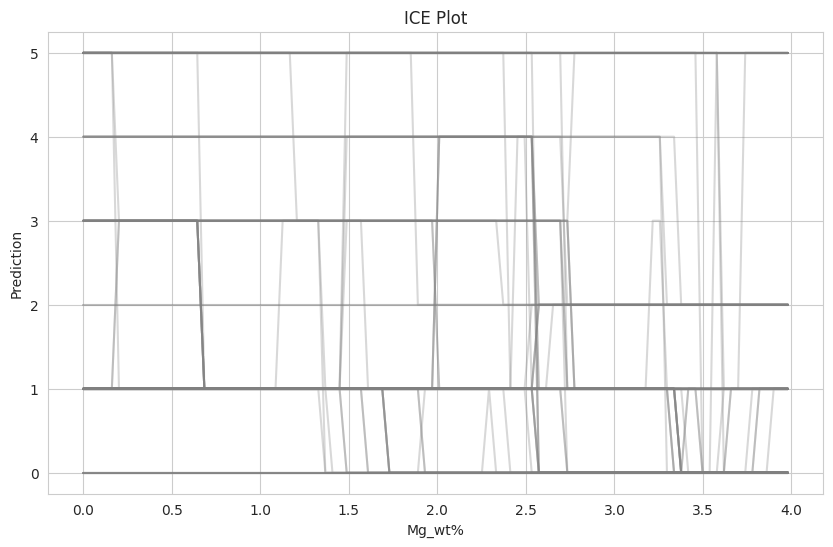

In [ ]:
plot_ice(feature_values, ice_data, xlabel='Mg_wt%')

In [ ]:
feature_idx = 3  # al_wt%
feature_values = np.linspace(min(X[:, feature_idx]), max(X[:, feature_idx]), num=100)

In [ ]:
feature_values, ice_data = ice_plot(modelforest, X_train, feature_idx, feature_values)

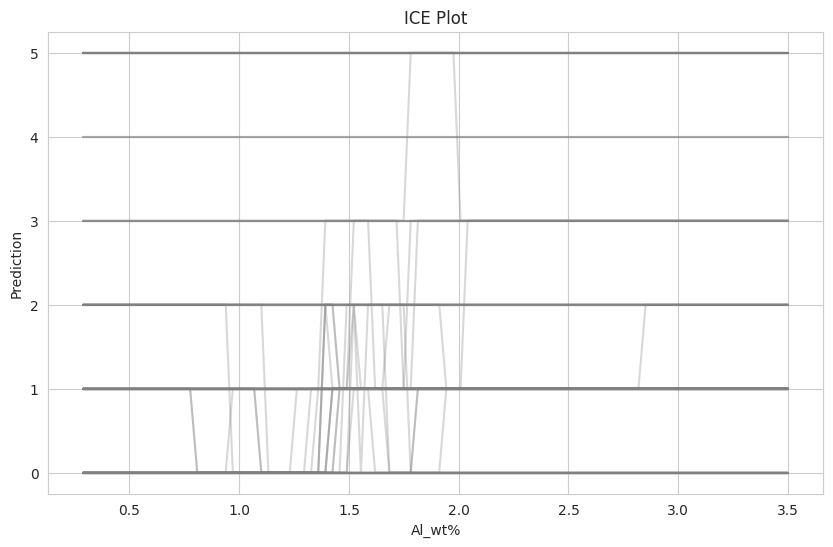

In [ ]:
plot_ice(feature_values, ice_data, xlabel='Al_wt%')

In [ ]:
##DATA PREPROCESSING
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:, 1:10]
y = df.iloc[:, 10]
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_
feature_names = np.array(['Refractive Index',
                 'Na_wt%',
                 'Mg_wt%',
                 'Al_wt%',
                 'Si_wt%',
                 'K_wt%',
                 'Ca_wt%',
                 'Ba_wt%',
                 'Fe_wt%'], dtype=object)

In [ ]:
##TRAIN/TEST SPLIT AND PIPELINES
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

In [ ]:
%%capture
!pip install pdpbox==0.2.0

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_interact, pdp_interact_plot, pdp_plot

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#figure(figsize=(10,10))

In [ ]:
#Partial dependence plot

def pdp(feature_of_interest, X_test, model, title="", ylabel="", xlabel="", xlim=(0.10)):
  isolated= pdp_isolate(
      model = model,
      dataset = df,
      model_features = X_train.columns,
      feature = feature_of_interest,
      num_grid_points = 50
      )

  pdp_plot(isolated, feature_name=feature_of_interest)
  plt.xlim(xlim)
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)

In [ ]:
X_train.columns

Index(['refractive index', 'Na_wt%', 'Mg_wt%', 'Al_wt%', 'Si_wt%', 'K_wt%',
       'Ca_wt%', 'Ba_wt%', 'Fe_wt%'],
      dtype='object')

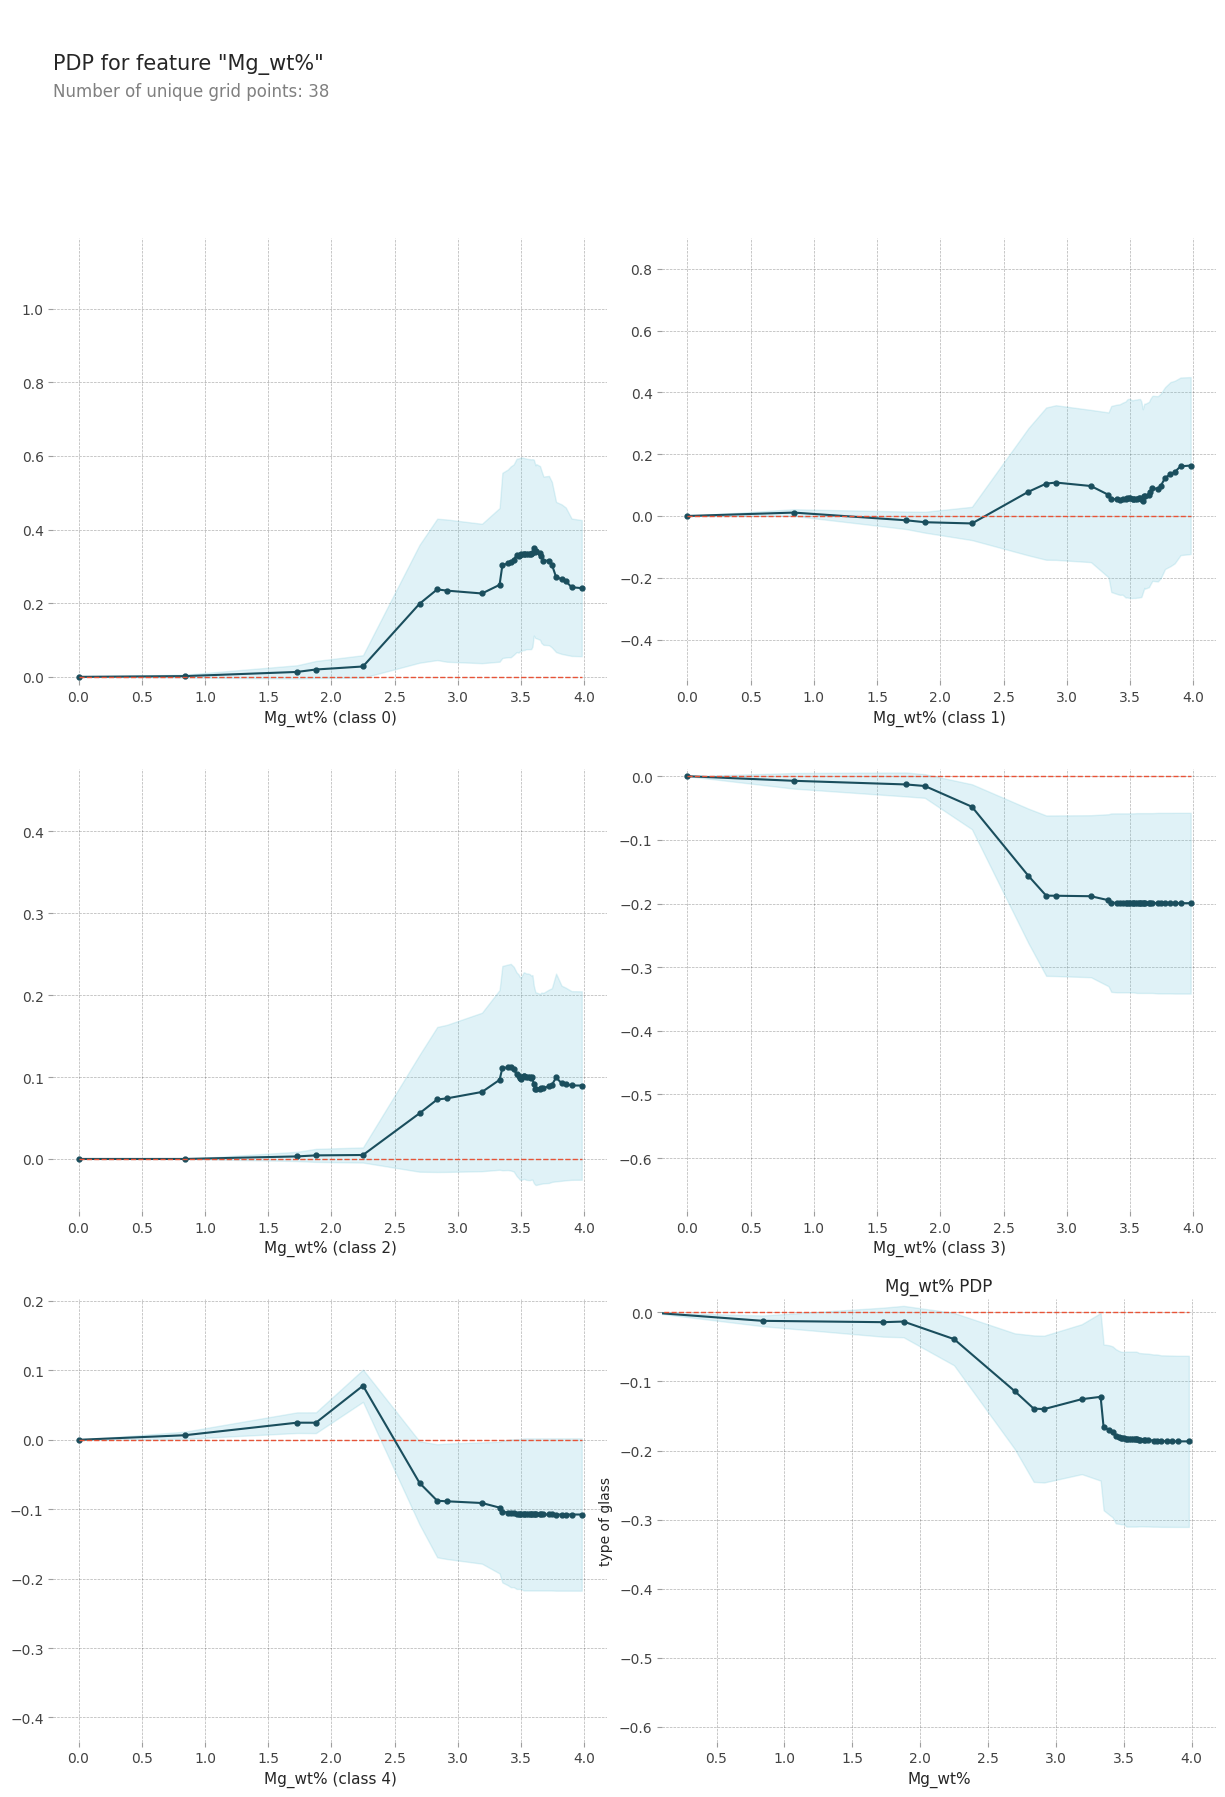

In [ ]:
pdp('Mg_wt%', X_test, modelforest,
    title= "Mg_wt% PDP",
    ylabel= 'type of glass',
    xlabel= 'Mg_wt%')

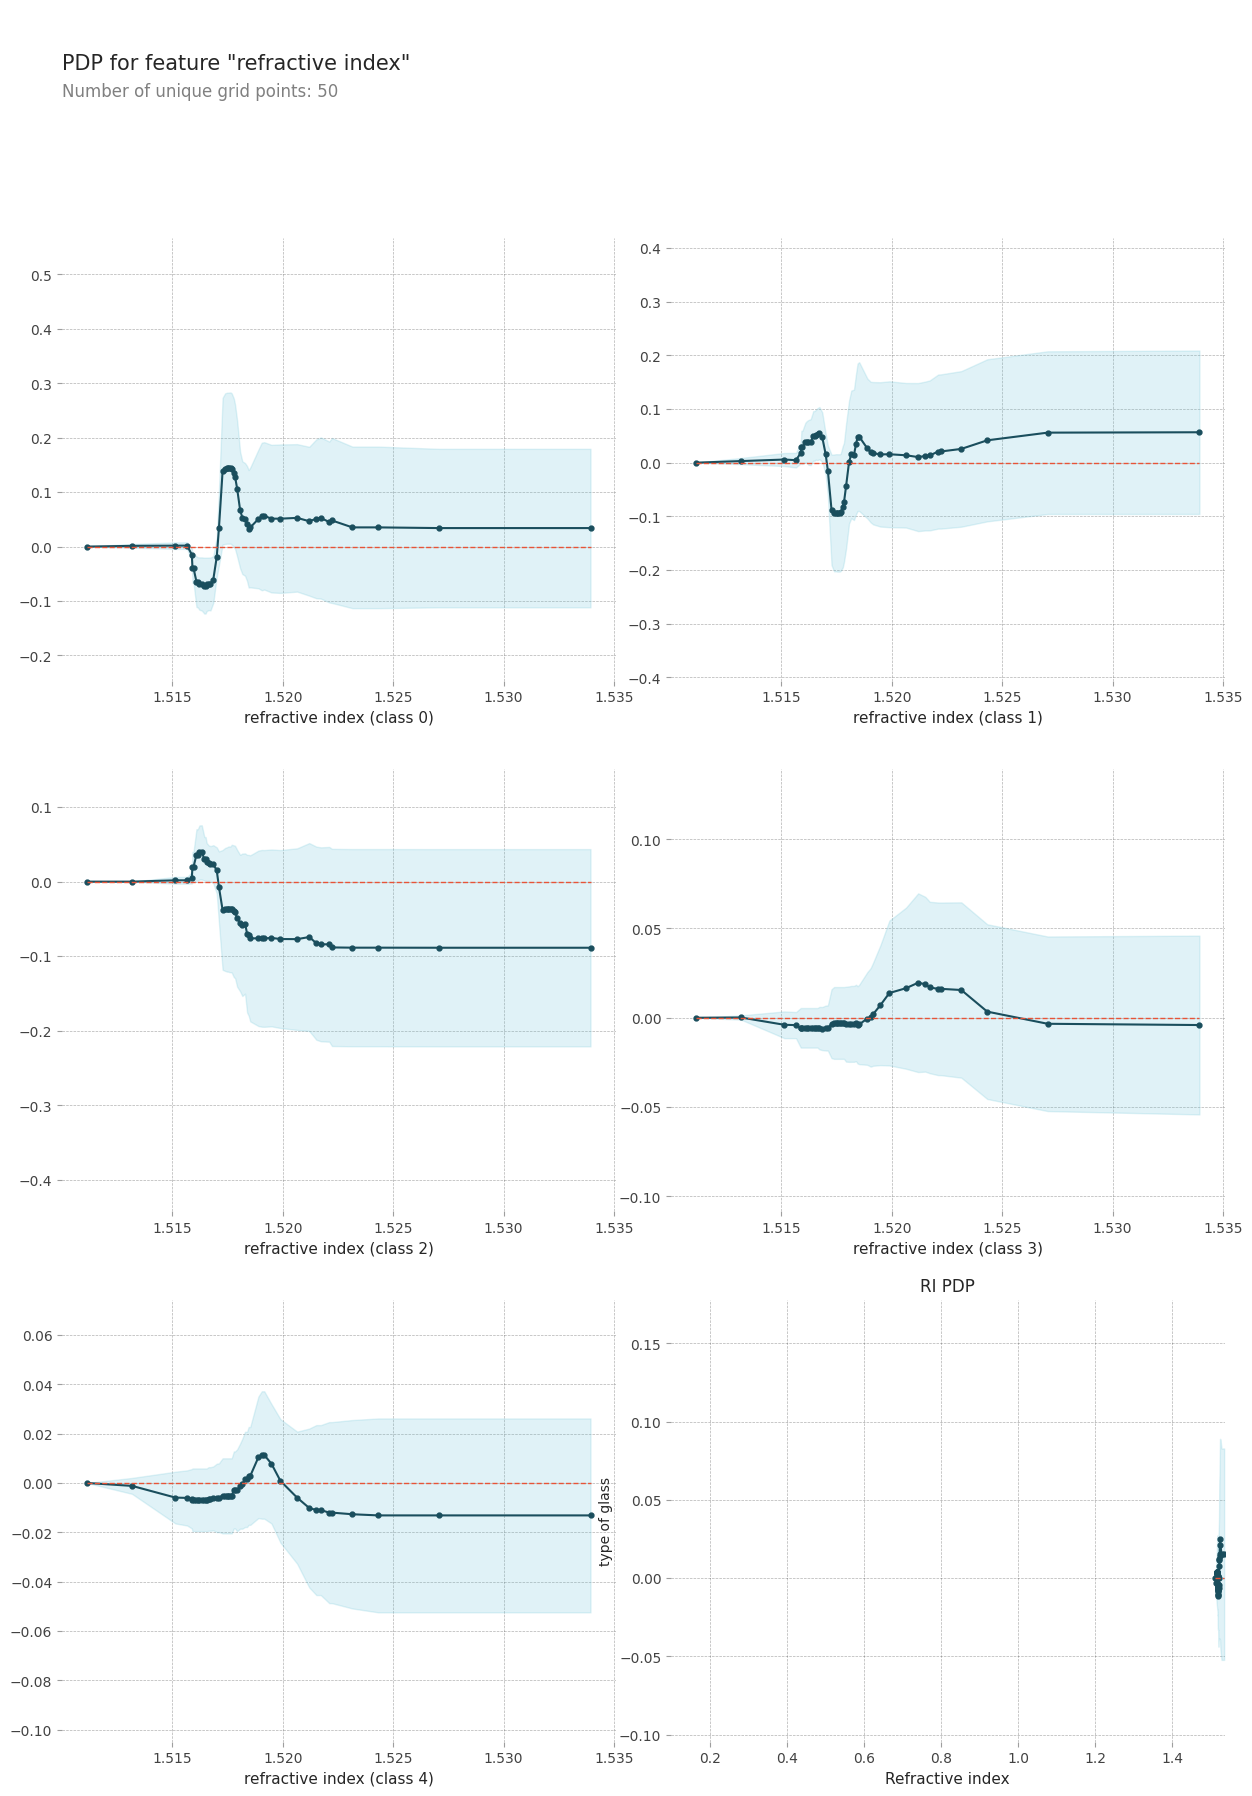

In [ ]:
pdp('refractive index', X_test, modelforest,
    title= "RI PDP",
    ylabel= 'type of glass',
    xlabel= 'Refractive index')

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 11.3 MB/s eta 0:00:00


In [ ]:
import shap

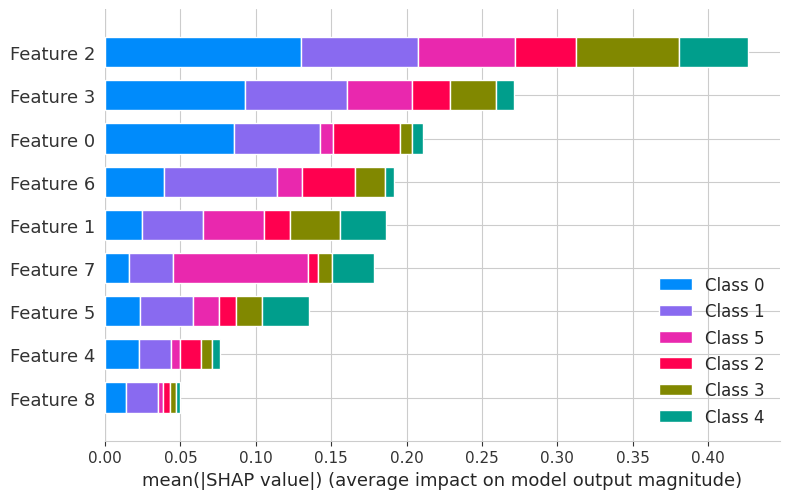

In [ ]:
explainer = shap.TreeExplainer(gsB.best_estimator_)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test,plot_type="bar")